In [1]:
symbol = input("Enter the symbol : ")

In [2]:
from nse import *
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [3]:
today = datetime.now()
oneyearago = today - timedelta(days=365*5)

date_format = "%d-%m-%Y"
try:
    df = scrape_data(f"{oneyearago.strftime(date_format)}",f"{today.strftime(date_format)}",symbol)
    df.to_csv(f"{symbol}.csv")
except Exception as e:
    print(e)
    df = pd.read_csv(f"{symbol}.csv")
rawdata = df.copy()
df.head()

,Date,Symbol,Series,High Price,Low Price,Open Price,Close Price,Last Price,Prev Close Price,Total Traded Quantity,Total Traded Value,52 Week High Price,52 Week Low Price
0,2018-08-07,TCS,EQ,1979.15,1960.50,1978.20,1967.35,1969.0,1975.55,1353560,2.662908e+09,3674.8,1711.15
1,2018-08-08,TCS,EQ,1978.30,1962.00,1972.00,1974.00,1975.0,1967.35,1315062,2.590100e+09,3674.8,1711.15
2,2018-08-09,TCS,EQ,1980.80,1966.00,1980.00,1974.35,1978.0,1974.00,2060297,4.068073e+09,3674.8,1711.15
3,2018-08-10,TCS,EQ,1996.50,1972.05,1980.95,1993.10,1992.0,1974.35,2784105,5.528317e+09,3674.8,1711.15
4,2018-08-13,TCS,EQ,2004.25,1990.00,1997.80,2000.15,1999.5,1993.10,3559575,7.112184e+09,3674.8,1711.15


In [4]:
df = df[['Date','High Price', 'Low Price', 'Open Price','Close Price', 'Total Traded Quantity']]
df.columns = ['Date','high', 'low', 'open','close', 'volume']
df.head()

,Date,high,low,open,close,volume
0,2018-08-07,1979.15,1960.50,1978.20,1967.35,1353560
1,2018-08-08,1978.30,1962.00,1972.00,1974.00,1315062
2,2018-08-09,1980.80,1966.00,1980.00,1974.35,2060297
3,2018-08-10,1996.50,1972.05,1980.95,1993.10,2784105
4,2018-08-13,2004.25,1990.00,1997.80,2000.15,3559575


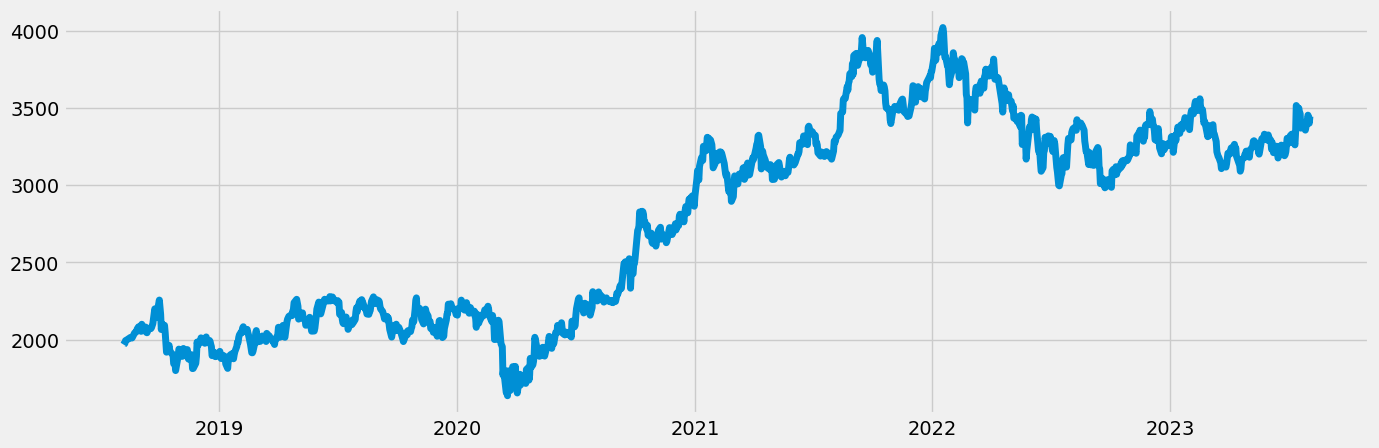

In [6]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(df['Date'],df['close'],label="Close", linestyle="-", linewidth=5)

In [7]:
df.columns = ['Date','High', 'Low', 'Open','Close', 'Volume']

env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)


e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


In [8]:
env.signal_features, env.action_space

(array([[ 1.96735e+03,  0.00000e+00],
        [ 1.97400e+03,  6.65000e+00],
        [ 1.97435e+03,  3.50000e-01],
        [ 1.99310e+03,  1.87500e+01],
        [ 2.00015e+03,  7.05000e+00],
        [ 2.00355e+03,  3.40000e+00],
        [ 2.00850e+03,  4.95000e+00],
        [ 2.01275e+03,  4.25000e+00],
        [ 2.00995e+03, -2.80000e+00],
        [ 2.01765e+03,  7.70000e+00],
        [ 2.03510e+03,  1.74500e+01],
        [ 2.04300e+03,  7.90000e+00],
        [ 2.05090e+03,  7.90000e+00],
        [ 2.06920e+03,  1.83000e+01],
        [ 2.07200e+03,  2.80000e+00],
        [ 2.08240e+03,  1.04000e+01],
        [ 2.07840e+03, -4.00000e+00],
        [ 2.05290e+03, -2.55000e+01],
        [ 2.09890e+03,  4.60000e+01],
        [ 2.07925e+03, -1.96500e+01],
        [ 2.07530e+03, -3.95000e+00],
        [ 2.07985e+03,  4.55000e+00],
        [ 2.08075e+03,  9.00000e-01],
        [ 2.04625e+03, -3.45000e+01],
        [ 2.04395e+03, -2.30000e+00],
        [ 2.06540e+03,  2.14500e+01],
        [ 2.

info {'total_reward': 52.29999999999927, 'total_profit': 0.7107232813139761, 'position': 0}


e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The result retu

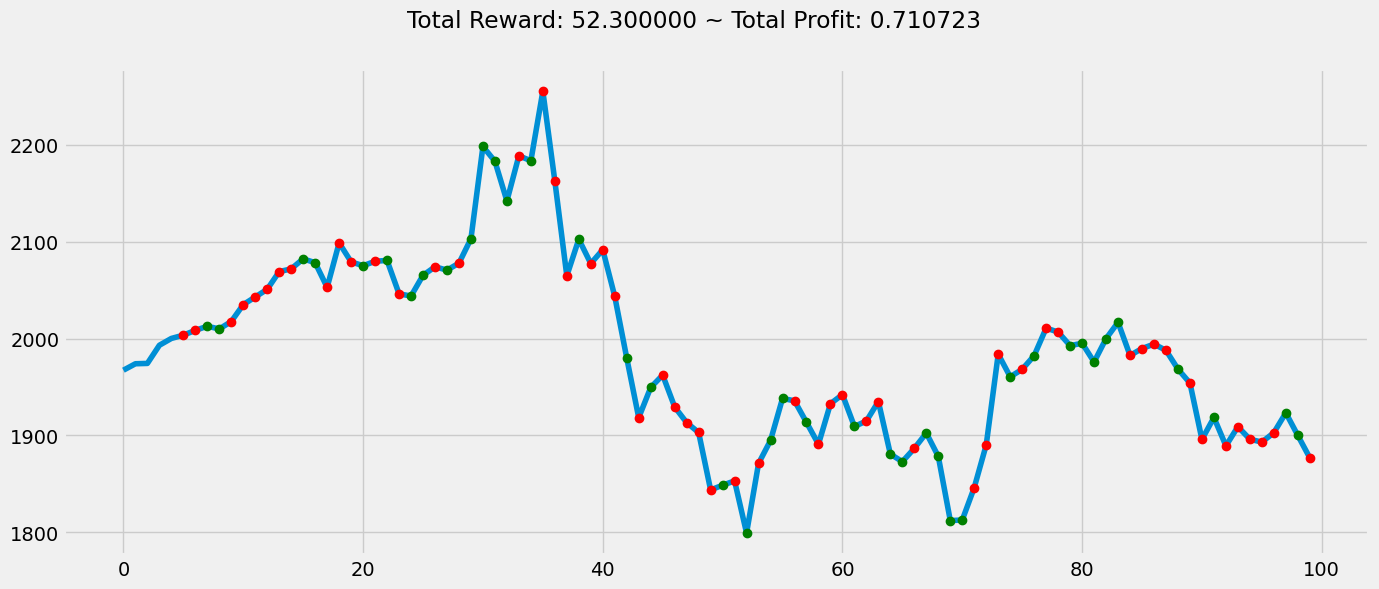

In [9]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [10]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [11]:
df.dtypes

Date      datetime64[ns]
High             float64
Low              float64
Open             float64
Close            float64
Volume             int64
dtype: object

In [13]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)
df.head(15)

,Date,High,Low,Open,Close,Volume,SMA,RSI,OBV
0,2018-08-07,1979.15,1960.50,1978.20,1967.35,1353560,0.000000,0.000000,0.0
1,2018-08-08,1978.30,1962.00,1972.00,1974.00,1315062,0.000000,100.000000,1315062.0
2,2018-08-09,1980.80,1966.00,1980.00,1974.35,2060297,0.000000,100.000000,3375359.0
3,2018-08-10,1996.50,1972.05,1980.95,1993.10,2784105,0.000000,100.000000,6159464.0
4,2018-08-13,2004.25,1990.00,1997.80,2000.15,3559575,0.000000,100.000000,9719039.0
5,2018-08-14,2024.60,1982.40,1992.00,2003.55,3311765,0.000000,100.000000,13030804.0
6,2018-08-16,2020.05,1995.00,2000.30,2008.50,2152065,0.000000,100.000000,15182869.0
7,2018-08-17,2021.90,2004.00,2013.85,2012.75,1213731,0.000000,100.000000,16396600.0
8,2018-08-20,2024.00,2003.70,2024.00,2009.95,1587032,0.000000,92.244914,14809568.0
9,2018-08-21,2024.00,2004.00,2010.15,2017.65,1376866,0.000000,93.693359,16186434.0


In [14]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [21]:
class TradingEnv(StocksEnv):
    _process_data = add_signals
    
env2 = TradingEnv(df=df, window_size=12, frame_bound=(20,len(df["Date"])-100))

In [22]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [24]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=5i0000)

----------------------------------
| explained_variance | -0.000424 |
| fps                | 20        |
| nupdates           | 1         |
| policy_entropy     | 0.691     |
| total_timesteps    | 5         |
| value_loss         | 1.87e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.000346 |
| fps                | 486      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 18.1     |
---------------------------------
----------------------------------
| explained_variance | -0.000586 |
| fps                | 552       |
| nupdates           | 200       |
| policy_entropy     | 0.69      |
| total_timesteps    | 1000      |
| value_loss         | 14.7      |
----------------------------------
----------------------------------
| explained_variance | -5.74e+04 |
| fps                | 584       |
| nupdates           | 300       |
| policy_entropy     | 0.692

In [27]:
env = TradingEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -228.85000000000082, 'total_profit': 0.49545266321756815, 'position': 0}


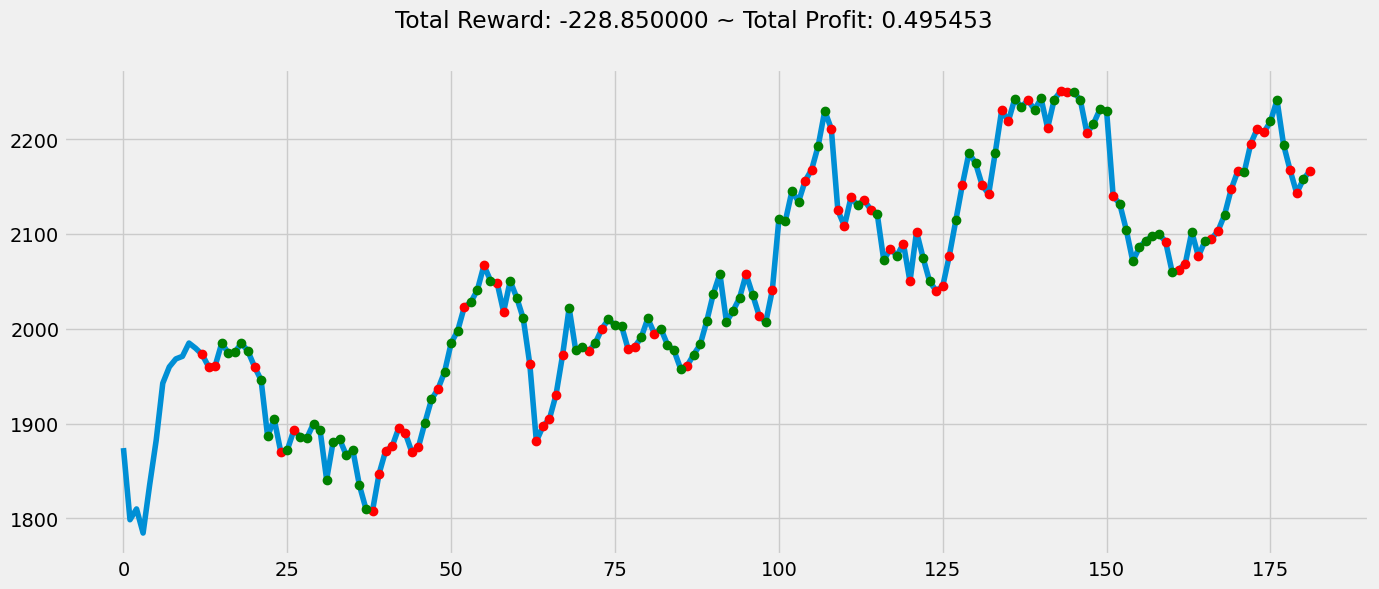

In [28]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()